<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Insurance_log_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

In [57]:
df = pd.read_csv('/content/drive/MyDrive/logistic regression dataset-Social_Network_Ads.csv')




In [58]:
df.shape

(400, 5)

In [59]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [60]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [61]:
df=df.drop('User ID', axis=1)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [62]:
df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)


In [63]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


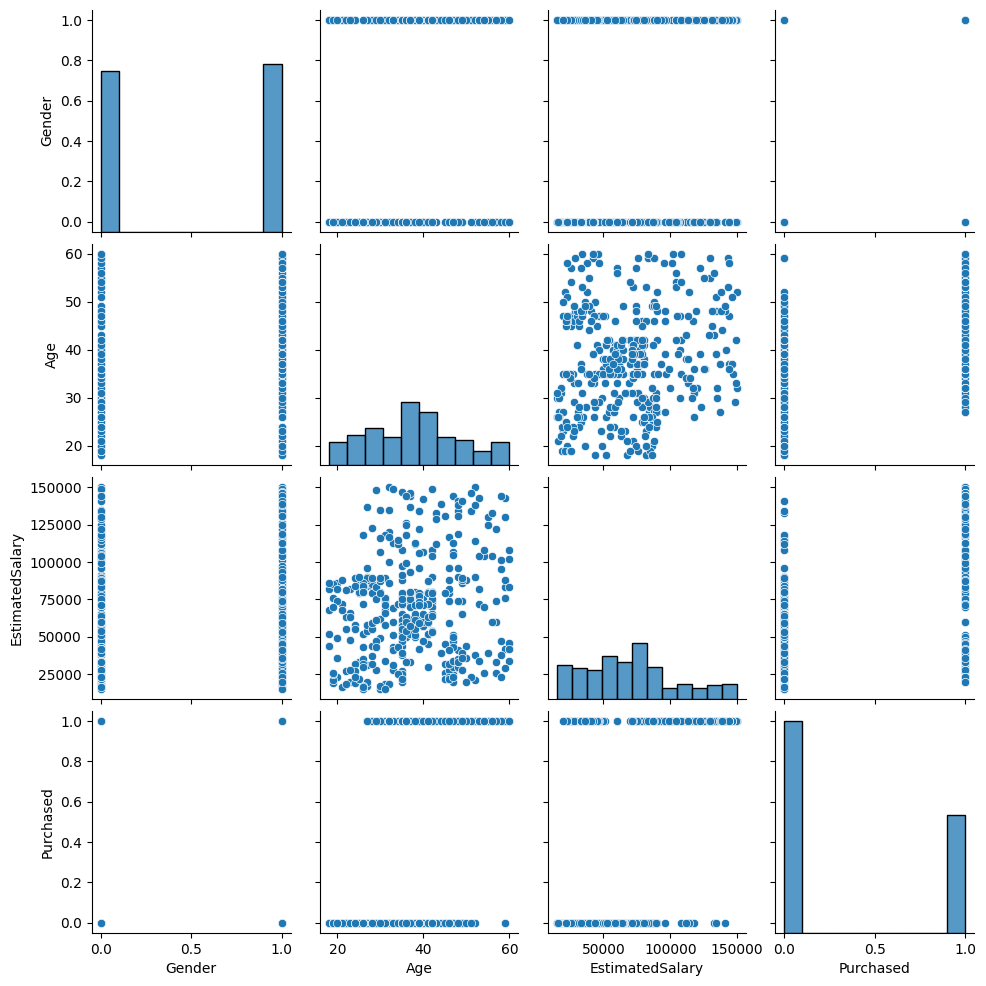

In [64]:
sns.pairplot(df)

<Axes: >

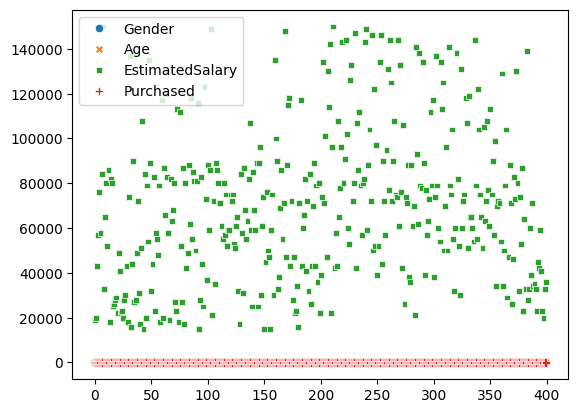

In [65]:
sns.scatterplot(df)

In [66]:
x = df.drop(['Purchased', 'Gender'], axis=1).values
y = df['Purchased'].values

<Axes: xlabel='Age', ylabel='Purchased'>

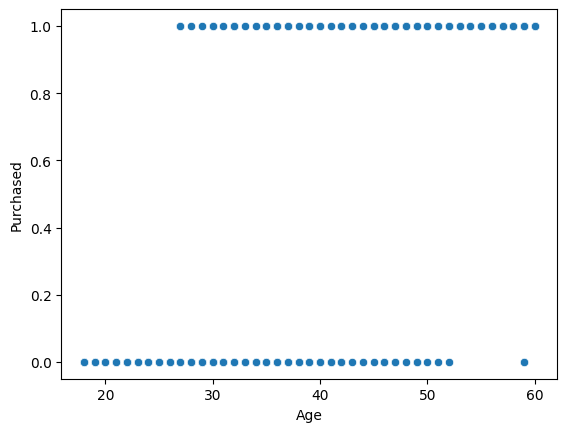

In [67]:
sns.scatterplot(data=df, x="Age", y="Purchased")

<Axes: xlabel='EstimatedSalary', ylabel='Purchased'>

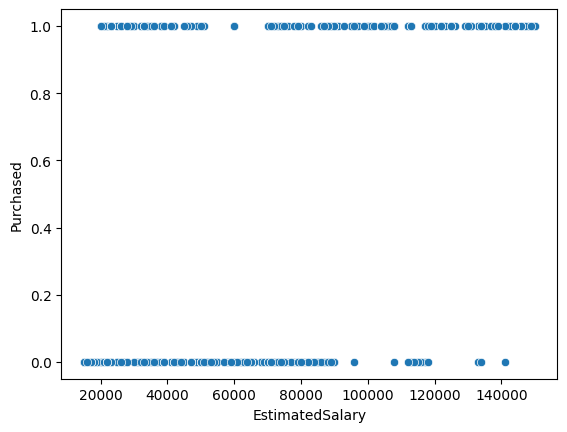

In [68]:
sns.scatterplot(data=df, x="EstimatedSalary", y="Purchased")

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)




In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [71]:
from sklearn.ensemble import RandomForestClassifier
modelf = RandomForestClassifier()
modelf.fit(x_train, y_train)

RandomForestClassifier()

In [72]:
from sklearn.svm import SVC
modelsv = SVC()
modelsv.fit(x_train, y_train)

SVC()

In [73]:
from sklearn.tree import DecisionTreeClassifier
modelt = DecisionTreeClassifier()
modelt.fit(x_train, y_train)

DecisionTreeClassifier()

In [74]:
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.6583333333333333

In [75]:
y_predsv = modelsv.predict(x_test)
modelsv.score(x_test, y_test)

0.7916666666666666

In [76]:
y_predt = modelt.predict(x_test)
modelt.score(x_test, y_test)

0.875

In [77]:
y_predf = modelf.predict(x_test)
modelf.score(x_test, y_test)

0.9083333333333333

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_predf)
cm


array([[73,  6],
       [ 5, 36]])

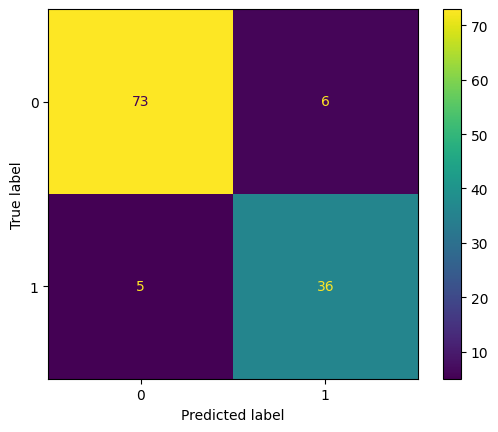

In [79]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelf.classes_)
display.plot()



In [80]:
print(classification_report(y_test, y_predf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        79
           1       0.86      0.88      0.87        41

    accuracy                           0.91       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



In [ ]:
modelf.predict_proba(x_test)

In [ ]:
x_test

In [83]:
modelf.predict([[46,41000]])

array([1])

In [84]:
modelf.predict([[36, 33000]])

array([0])

In [85]:
modelf.predict([[41, 88888]])

array([1])

In [86]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0
399,1,49,36000,1


# thank you